In [3]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import plotly.graph_objs as go
import plotly.express as px

# Load the data
df = pd.read_csv("Dime_allMoves_08_23.csv")

# Preparing the data
X = df[['D1', 'D2', 'D3', 'D4']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# training and testing sets
X_train = X[:int(0.7*len(X)), :]
X_test = X[int(0.7*len(X)):, :]
y_train = df['Fqgen'][:int(0.7*len(X))]
y_test = df['Fqgen'][int(0.7*len(X)):]

# DBSCAN clustering model
model = DBSCAN(eps=0.5, min_samples=5)
y_pred = model.fit_predict(X_train)

# Evaluating the model using silhouette score and calinski harabasz score - validation metric, 
silhouette = silhouette_score(X_train, y_pred)
calinski = calinski_harabasz_score(X_train, y_pred)
print('Silhouette score:', silhouette)
print('Calinski Harabasz score:', calinski)

# Visualizing the clusters in a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X_train[:, 0],
    y=X_train[:, 1],
    z=X_train[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=y_pred,
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='D1',
    yaxis_title='D2',
    zaxis_title='D3'
))
fig.show()


Silhouette score: -0.29540515919493426
Calinski Harabasz score: 4.954934010499471


Cannot compute silhouette and calinski-harabasz scores as there is only one cluster


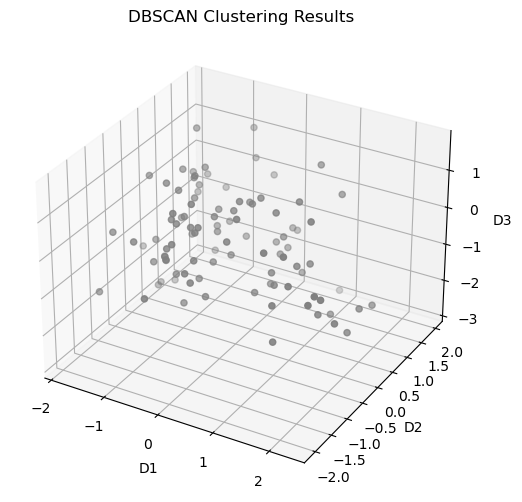

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv("Dime_allMoves_08_23.csv")

# select the features for clustering
X = data.iloc[:, 2:6].values

# normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# training and testing set
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# DBSCAN clustering for training
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

# predicting clusters for the test data
y_pred = dbscan.fit_predict(X_test)

# silhouette and calinski-harabasz scores
if len(np.unique(y_pred)) > 1:
    silhouette = silhouette_score(X_test, y_pred)
    calinski = calinski_harabasz_score(X_test, y_pred)
    print("Silhouette Score:", silhouette)
    print("Calinski-Harabasz Score:", calinski)
else:
    print("Cannot compute silhouette and calinski-harabasz scores; undefined/uncertain clsuter size")

# visualize the results using a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# assign colors to each point based on predicted clusters
colors = np.array(['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'orange', 'purple', 'pink', 'grey'])
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=colors[y_pred], marker='o')

# set labels and title
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
ax.set_title('DBSCAN Clustering Results')

plt.show()


C:\Users\Neuroeconomics Lab\AppData\Local\Temp\ipykernel_11388\3557481685.py:34: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a singl

Silhouette score: -0.23588244103852743
Calinski-Harabasz score: 6.078666803733703


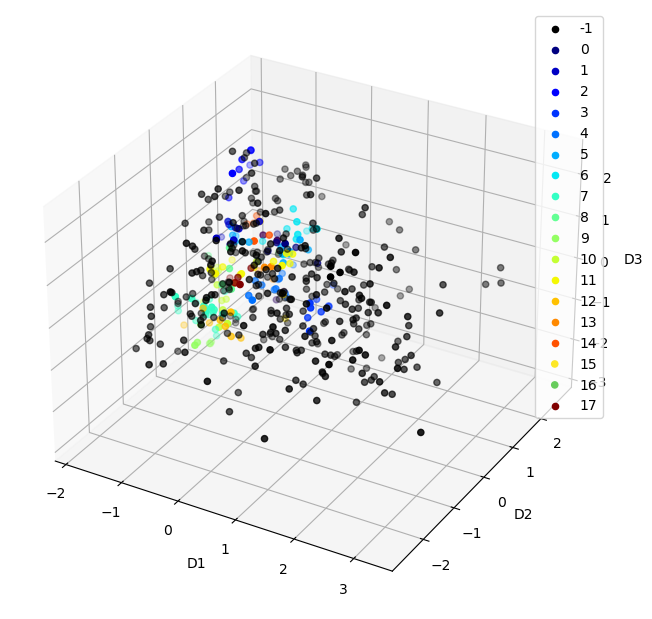

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Dime_allMoves_08_23.csv')

# separate the Fqgen column from the rest of the data
Fqgen = data['Fqgen'].values.reshape(-1, 1)
X = data.iloc[:, 2:6].values

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# apply DBSCAN clustering
model = DBSCAN(eps=0.5, min_samples=5)
y_pred = model.fit_predict(X)

# evaluate the model using silhouette and calinski-harabasz scores
silhouette = silhouette_score(X, y_pred)
calinski = calinski_harabasz_score(X, y_pred)
print(f"Silhouette score: {silhouette}")
print(f"Calinski-Harabasz score: {calinski}")



# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

# color code the points based on their cluster label
labels = np.unique(y_pred)
for label in labels:
    if label == -1:
        # noise points are black
        color = 'k'
    else:
        # all other clusters have a distinct color
        color = plt.cm.jet(float(label) / np.max(y_pred))
    ax.scatter(X[y_pred == label, 0], X[y_pred == label, 1], X[y_pred == label, 2], c=color)

# label the axes and add a legend
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.legend(labels)

plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

data = pd.read_csv("Dime_allMoves_08_23.csv")

# train and test sets
train_data = data[data["Move"] == 0].drop(["Move", "subID", "SelfRank"], axis=1)
test_data = data[data["Move"] == 1].drop(["Move", "subID", "SelfRank"], axis=1)

# Normalizing the data
scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train_data)

# Apply Agglomerative Clustering
n_clusters = range(2, 10)
models = []
scores = {"silhouette": [], "calinski_harabasz": []}
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n, linkage="ward")
    y_pred = model.fit_predict(train_data_norm)
    models.append(model)
    silhouette = silhouette_score(train_data_norm, y_pred)
    calinski = calinski_harabasz_score(train_data_norm, y_pred)
    scores["silhouette"].append(silhouette)
    scores["calinski_harabasz"].append(calinski)

# best model based on the scores
best_model_idx = np.argmax(scores["silhouette"])
best_model = models[best_model_idx]
print("Best number of clusters:", n_clusters[best_model_idx])
print("Silhouette score:", scores["silhouette"][best_model_idx])
print("Calinski-Harabasz score:", scores["calinski_harabasz"][best_model_idx])

# Visualizing the clusters in a 3D interactive plot
train_data["cluster"] = best_model.labels_
fig = px.scatter_3d(train_data, x="D1", y="D2", z="D3", color="cluster")
fig.show()


Best number of clusters: 2
Silhouette score: 0.21473490324379355
Calinski-Harabasz score: 40.73538037027629


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

data = pd.read_csv("Dime_allMoves_08_23.csv")

# Split the data into train and test sets
train_data = data[data["Move"] == 0].drop(["Move", "subID", "SelfRank"], axis=1)
test_data = data[data["Move"] == 1].drop(["Move", "subID", "SelfRank"], axis=1)

# Normalize the data
scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train_data)

# Apply Agglomerative Clustering
n_clusters = range(2, 10)
models = []
scores = {"silhouette": [], "calinski_harabasz": []}
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n, linkage="ward")
    y_pred = model.fit_predict(train_data_norm)
    models.append(model)
    silhouette = silhouette_score(train_data_norm, y_pred)
    calinski = calinski_harabasz_score(train_data_norm, y_pred)
    scores["silhouette"].append(silhouette)
    scores["calinski_harabasz"].append(calinski)

# Choose the best model based on the scores
best_model_idx = np.argmax(scores["silhouette"])
best_model = models[best_model_idx]
print("Best number of clusters:", n_clusters[best_model_idx])
print("Silhouette score:", scores["silhouette"][best_model_idx])
print("Calinski-Harabasz score:", scores["calinski_harabasz"][best_model_idx])

# Analyze the relationship between Dimension values and Fqgen for each cluster
train_data["cluster"] = best_model.labels_
cluster_means = train_data.groupby("cluster").mean()
print(cluster_means)

# 3D interactive plot
fig = px.scatter_3d(train_data, x="D1", y="D2", z="D3", color="cluster")
fig.show()


Best number of clusters: 2
Silhouette score: 0.21473490324379355
Calinski-Harabasz score: 40.73538037027629
               D1        D2        D3        D4     Fqgen
cluster                                                  
0       -0.538963  0.017424  0.213963 -0.275663  0.159394
1        0.473057 -0.537586 -0.348568  0.374516  0.483333


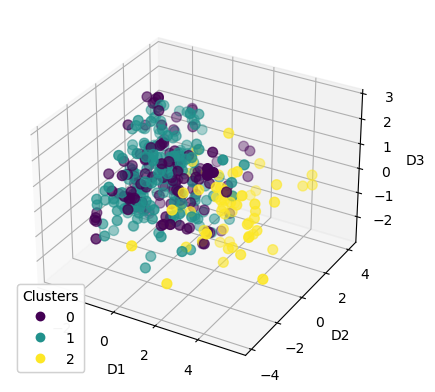

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load the data
data = pd.read_csv('Dime_allMoves_08_23.csv')

# dividing Fqgen into 3 groups based on SelfRank
low_rank = data[data['SelfRank'] == 1]['Fqgen']
medium_rank = data[data['SelfRank'] == 2]['Fqgen']
high_rank = data[data['SelfRank'] == 3]['Fqgen']

# median Fqgen value for each group
low_median = np.median(low_rank)
medium_median = np.median(medium_rank)
high_median = np.median(high_rank)

# new column with the Fqgen groups
data['Fqgen_group'] = np.where(data['Fqgen'] <= low_median, 'Low', 
                               np.where(data['Fqgen'] <= medium_median, 'Medium', 'High'))

# dropping SelfRank and Fqgen columns
data.drop(['SelfRank', 'Fqgen'], axis=1, inplace=True)

# training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# normalizing the data
scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train_data.iloc[:, :-1])
test_data_norm = scaler.transform(test_data.iloc[:, :-1])

# performing k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_data_norm)
train_data['cluster'] = kmeans.labels_

# plot the clusters in a 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_data['D1'], train_data['D2'], train_data['D3'], c=train_data['cluster'],
                     s=50, cmap='viridis')
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
legend = ax.legend(*scatter.legend_elements(), loc='lower left', title='Clusters')
ax.add_artist(legend)
plt.show()

# fit a k-nearest neighbors model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_data_norm, train_data['Fqgen_group'])

# predict the Fqgen group for the test data
y_pred = knn.predict(test_data_norm)

# mean squared error
mse = mean_squared_error(test_data['Fqgen_group'], y_pred)
print(f"Mean squared error: {mse}")

# predicted vs. actual Fqgen groups for the test data
fig, ax = plt.subplots()
ax.scatter(test_data.index, test_data['Fqgen_group'], label='Actual')
ax.scatter(test_data.index, y_pred, label='Predicted')
ax.set_xlabel('Index')
ax.set_ylabel('Fqgen group')
ax.legend()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go
data = pd.read_csv("Dime_allMoves_08_23.csv")

# feature matrix and target variable
X = data[["D1", "D2", "D3", "D4"]]
y = data["Fqgen"]

# normalize data
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# encode SelfRank as categorical variable
le = LabelEncoder()
data["SelfRank"] = le.fit_transform(data["SelfRank"])

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# training KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print(mse)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_norm)

sil_score = silhouette_score(X_norm, kmeans.labels_)
print(sil_score)

# 3D scatter plot
fig = px.scatter_3d(data, x="D1", y="D2", z="D3", color="SelfRank", symbol="Move")
fig.show()


0.026935243243243243
0.19115809724088048


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("Dime_allMoves_08_23.csv")

# feature matrix and target variable
X = data[["D1", "D2", "D3", "D4"]]
y = data["Fqgen"]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

le = LabelEncoder()
data["SelfRank"] = le.fit_transform(data["SelfRank"])

# looping over SelfRank groups
for i in range(3):
    # filter data by SelfRank
    data_group = data[data["SelfRank"] == i]

    # feature matrix and target variable for group
    X_group = data_group[["D1", "D2", "D3", "D4"]]
    y_group = data_group["Fqgen"]

    # normalizing data for group
    scaler_group = StandardScaler()
    X_norm_group = scaler_group.fit_transform(X_group)

    # splitting data into training and testing sets for group
    X_train_group, X_test_group, y_train_group, y_test_group = train_test_split(X_norm_group, y_group, test_size=0.3, random_state=42)

    # KNN model for group
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_group, y_train_group)

    # predicting the Fqgen group for the test data for group
    y_pred_group = knn.predict(X_test_group)

    mse_group = np.mean((y_test_group - y_pred_group)**2)
    print(f"Mean Squared Error for group {i}: {mse_group}")

    # K-means clustering model for group
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X_norm_group)

    # silhouette for clustering performance for group
    sil_score_group = silhouette_score(X_norm_group, kmeans.labels_)
    print(f"Silhouette Score for group {i}: {sil_score_group}")

    # 3D scatter plot for group
    fig = px.scatter_3d(data_group, x="D1", y="D2", z="D3", color="SelfRank", symbol="Move")
    fig.show()


Mean Squared Error for group 0: 0.021046959999999993
Silhouette Score for group 0: 0.20367466910168844


Mean Squared Error for group 1: 0.023125920000000008
Silhouette Score for group 1: 0.22059543820919572


Mean Squared Error for group 2: 0.026295200000000005
Silhouette Score for group 2: 0.179979482387033


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by StandardScaler.

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("Dime_allMoves_08_23.csv")

X = data[["D1", "D2", "D3", "D4"]]
y = data["Fqgen"]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

le = LabelEncoder()
data["SelfRank"] = le.fit_transform(data["SelfRank"])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = np.mean((y_test - y_pred)**2)
print(mse)

# K-means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_norm)

sil_score = silhouette_score(X_norm, kmeans.labels_)
print(sil_score)

# 3D scatter plot for each SelfRank group
for sr_group in range(4):
    fig = px.scatter_3d(data[data["SelfRank"] == sr_group], x="D1", y="D2", z="D3", color="Move")
    fig.show()


0.026935243243243243
0.19115809724088048


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import plotly.express as px

df = pd.read_csv('Dime_allMoves_08_23.csv')
X = df[['D1', 'D2', 'D3', 'D4']]
y = df['Fqgen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-nearest neighbors regression model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# predictions on testing set
y_pred = knn.predict(X_test)

# Evaluating model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 3D interactive plot
fig = px.scatter_3d(df, x='D1', y='D2', z='D3', color='Fqgen', symbol='SelfRank', opacity=0.8)
fig.show()


Mean Squared Error: 0.02563721212121212


Mean Squared Error: 0.026229297297297297


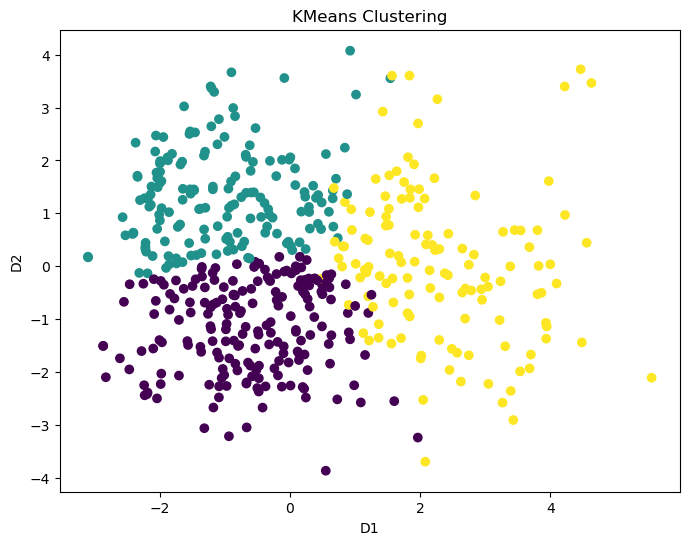

Predicted frequency of generous choices: [0.244 0.244 0.244]


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [29]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Dime_allMoves_08_23.csv')

# extracting required columns
X = df[['D1', 'D2', 'D3', 'D4']]
y = df['Fqgen']

# convert SelfRank into categorical values
df['SelfRank'] = pd.Categorical(df['SelfRank'], categories=[1,2,3])

# training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# performing k-nearest neighbors regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# plot the data points with cluster labels
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_)
plt.xlabel('D1')
plt.ylabel('D2')
plt.title('KMeans Clustering')
plt.show()

# predicting the frequency of generous choices using forecasting algorithm
X_future = np.array([[0.5, 0.6, 0.7, 0.8], [0.6, 0.7, 0.8, 0.9], [0.7, 0.8, 0.9, 1.0]])
y_future = knn.predict(X_future)
print("Predicted frequency of generous choices:", y_future)


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



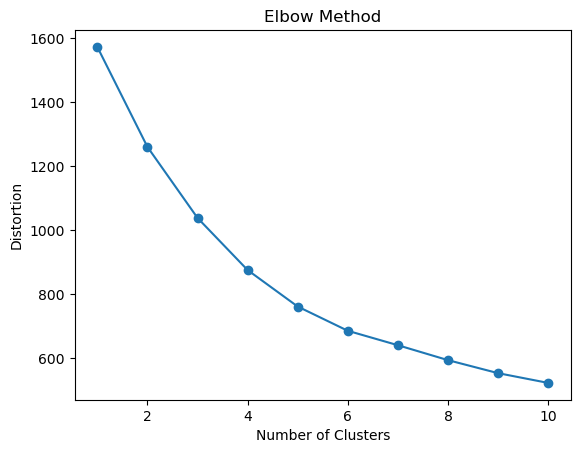

R2 score on test set: -0.16


In [30]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Dime_allMoves_08_23.csv')

# selecting relevant columns
X = df[['D1', 'D2', 'D3', 'D4']]
y = df['Fqgen']

# dividing the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# k-means clustering to identify the optimal number of clusters
distortions = []
max_clusters = 10
for n_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    distortions.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

# fit k-means model with the optimal number of clusters
n_clusters = 3  # based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)

# fit KNeighborsRegressor model to predict the frequency of generous choices from the D1-D4 values
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train_scaled, y_train)

# evaluate performance of the model on the testing set
y_pred = neigh.predict(X_test_scaled)
score = neigh.score(X_test_scaled, y_test)
print(f"R2 score on test set: {score:.2f}")


In [31]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Dime_allMoves_08_23.csv')

# relevant columns
X = df[['D1', 'D2', 'D3', 'D4']].values
y = df['Fqgen'].values

# Group Fqgen based on SelfRank
group_map = {1: 0, 2: 1, 3: 2}
df['Fqgen_group'] = df['SelfRank'].map(group_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a k-nearest neighbors regressor
k = 5  
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluating the model on the test set
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 0.03
R2 Score: 0.02


In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('Dime_allMoves_08_23.csv')

# features and target
target_feature = 'Fqgen'
independent_features = ['D1', 'D2', 'D3', 'D4']

# Divide Fqgen into 3 groups based on SelfRank
df['Fqgen_group'] = pd.cut(df[target_feature], bins=[-1, 0, 1, np.inf], labels=[1, 2, 3])

# Divide Move into 4 groups
df['Move_group'] = pd.cut(df['Move'], bins=[-1, 0, 1, 2, np.inf], labels=[0, 1, 2, 3])

X = df[independent_features].values
y = df['Fqgen_group'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# accuracy of the model:
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
my_data = pd.read_csv("Dime_09_23.csv")

# Subset the data to only include the relevant columns
my_data_sub = my_data[["D1", "D2", "D3", "D4", "Fqgen", "Move", "STAI_S_F",
                       "STAI_t_F", "STAI_total_F", "IRI_total_F", "IRI_PT_F",
                       "IRI_FS_F", "IRI_EC_F", "IRI_PD_F", "SDO_F", "RSE_F",
                       "Machn_A_F", "Mach_Ctrl_F", "Mach_S_F"]]

# categorical variables converted to binary indicator variables
my_data_sub = pd.get_dummies(my_data_sub, columns=["Move", "STAI_S_F",
                                                    "STAI_t_F", "STAI_total_F",
                                                    "IRI_PT_F", "IRI_FS_F",
                                                    "IRI_EC_F", "IRI_PD_F",
                                                    "SDO_F", "RSE_F",
                                                    "Machn_A_F", "Mach_Ctrl_F",
                                                    "Mach_S_F"])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(my_data_sub.drop(columns=["Fqgen"]), my_data_sub["Fqgen"], test_size=0.2, random_state=42)

# Fit k-means clustering model to the training data
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

# Predict the clusters for the training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Calculating the correlation matrix between the Fqgen, D1-D4 values, and questionnaires
corr_matrix = my_data_sub[["Fqgen", "D1", "D2", "D3", "D4"] + list(my_data_sub.columns[5:])].corr()

# Printing the correlation matrix
print(corr_matrix)
print(test_clusters)
print(train_clusters)

                   Fqgen        D1        D2        D3        D4  IRI_total_F  \
Fqgen           1.000000  0.025084 -0.116200  0.070019  0.132264     0.080120   
D1              0.025084  1.000000 -0.046348 -0.165893  0.244343     0.026419   
D2             -0.116200 -0.046348  1.000000 -0.022337  0.062188     0.068216   
D3              0.070019 -0.165893 -0.022337  1.000000 -0.017060    -0.008837   
D4              0.132264  0.244343  0.062188 -0.017060  1.000000     0.162659   
IRI_total_F     0.080120  0.026419  0.068216 -0.008837  0.162659     1.000000   
Move_0          0.073696 -0.189450 -0.077715  0.105270 -0.052712     0.019781   
Move_1         -0.073696  0.189450  0.077715 -0.105270  0.052712    -0.019781   
STAI_S_F_0      0.001398 -0.117320 -0.112066 -0.035735 -0.130696    -0.023445   
STAI_S_F_1     -0.001398  0.117320  0.112066  0.035735  0.130696     0.023445   
STAI_t_F_0     -0.037459  0.011221 -0.042467  0.067299  0.167254     0.041462   
STAI_t_F_1      0.037459 -0.

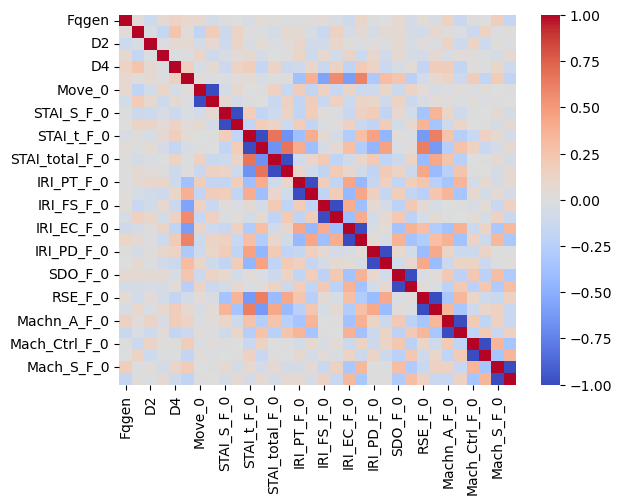

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = my_data_sub[["Fqgen", "D1", "D2", "D3", "D4"] + list(my_data_sub.columns[5:])].corr()

# heatmap using seaborn
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


<AxesSubplot:>

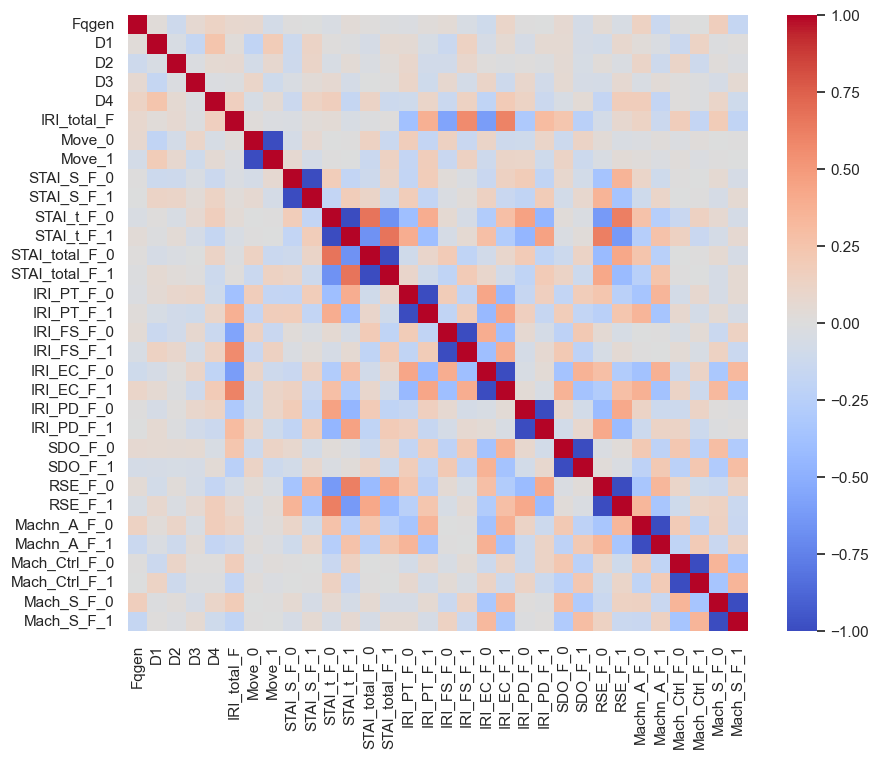

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

my_data = pd.read_csv("Dime_09_23.csv")

my_data_sub = my_data[["D1", "D2", "D3", "D4", "Fqgen", "Move", "STAI_S_F",
                       "STAI_t_F", "STAI_total_F", "IRI_total_F", "IRI_PT_F",
                       "IRI_FS_F", "IRI_EC_F", "IRI_PD_F", "SDO_F", "RSE_F",
                       "Machn_A_F", "Mach_Ctrl_F", "Mach_S_F"]]

my_data_sub = pd.get_dummies(my_data_sub, columns=["Move", "STAI_S_F",
                                                    "STAI_t_F", "STAI_total_F",
                                                    "IRI_PT_F", "IRI_FS_F",
                                                    "IRI_EC_F", "IRI_PD_F",
                                                    "SDO_F", "RSE_F",
                                                    "Machn_A_F", "Mach_Ctrl_F",
                                                    "Mach_S_F"])

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(my_data_sub.drop(columns=["Fqgen"]), my_data_sub["Fqgen"], test_size=0.2, random_state=42)

# k-means clustering model 
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)

# Predicting the clusters for the training and testing data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Calculate the correlation matrix between the Fqgen, D1-D4 values, and questionnaires
corr_matrix = my_data_sub[["Fqgen", "D1", "D2", "D3", "D4"] + list(my_data_sub.columns[5:])].corr()

# Plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)


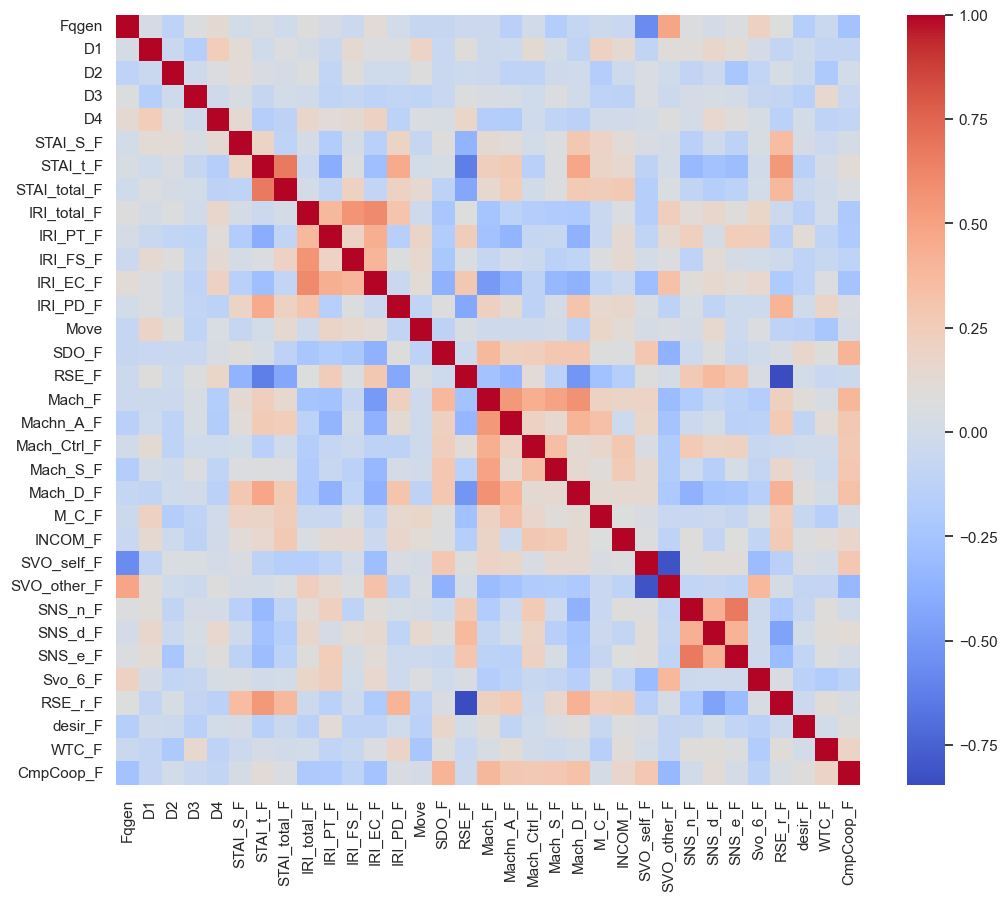

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Dime_09_23.csv')
cols_of_interest = ['Fqgen', 'D1', 'D2', 'D3', 'D4', 'STAI_S_F', 'STAI_t_F', 'STAI_total_F', 'IRI_total_F', 'IRI_PT_F', 'IRI_FS_F', 'IRI_EC_F', 'IRI_PD_F', 'Move', 'SDO_F', 'RSE_F', 'Mach_F', 'Machn_A_F', 'Mach_Ctrl_F', 'Mach_S_F', 'Mach_D_F', 'M_C_F', 'INCOM_F', 'SVO_self_F', 'SVO_other_F', 'SNS_n_F', 'SNS_d_F', 'SNS_e_F', 'Svo_6_F', 'RSE_r_F', 'desir_F', 'WTC_F', 'CmpCoop_F']
corr_matrix = df[cols_of_interest].corr()

# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()


c:\Users\Neuroeconomics Lab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



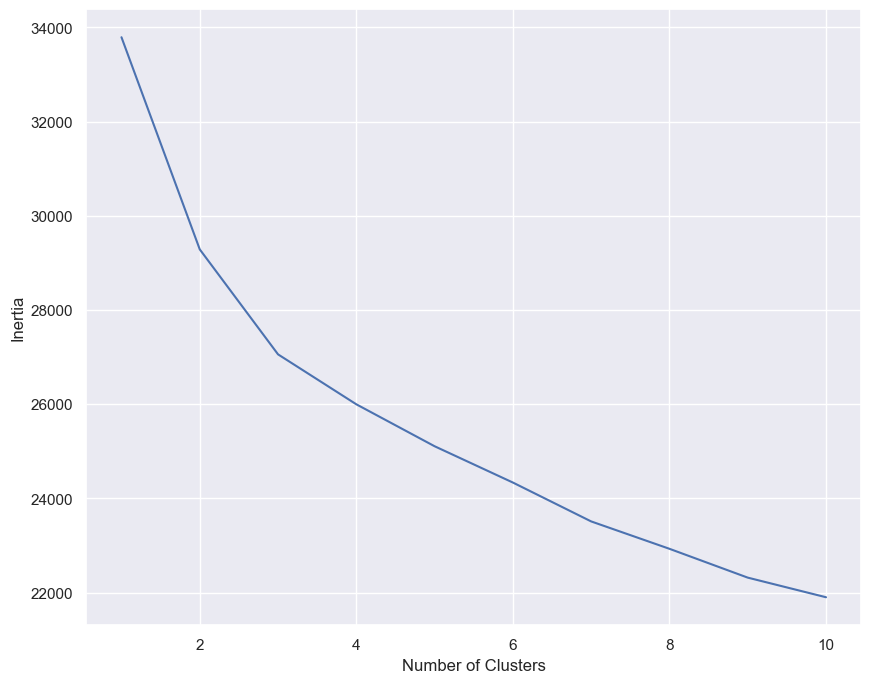

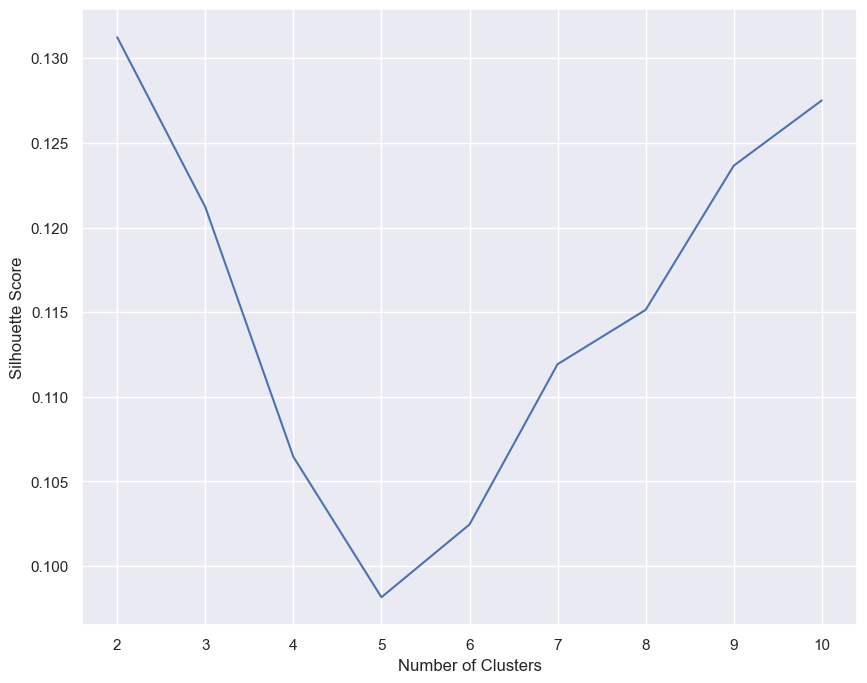

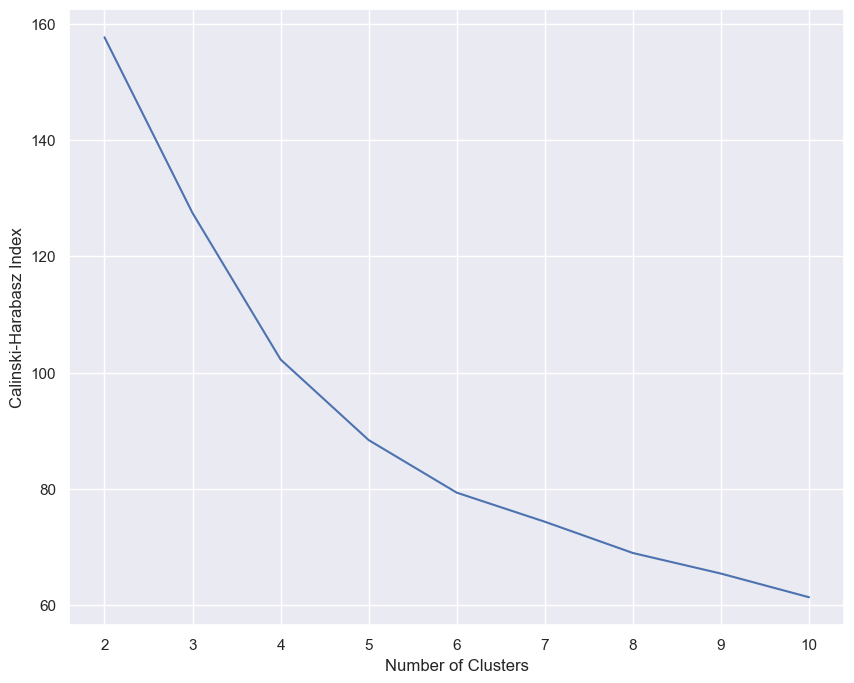

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('Dime_09_23.csv')
relevant_cols = ['Fqgen', 'D1', 'D2', 'D3', 'D4', 'STAI_S_F', 'STAI_t_F', 'STAI_total_F', 'IRI_total_F', 'IRI_PT_F', 'IRI_FS_F', 'IRI_EC_F', 'IRI_PD_F', 'Move', 'SDO_F', 'RSE_F', 'Mach_F', 'Machn_A_F', 'Mach_Ctrl_F', 'Mach_S_F', 'Mach_D_F', 'M_C_F', 'INCOM_F', 'SVO_self_F', 'SVO_other_F', 'SNS_n_F', 'SNS_d_F', 'SNS_e_F', 'Svo_6_F', 'RSE_r_F', 'desir_F', 'WTC_F', 'CmpCoop_F']

# creating a new dataframe with the relevant columns
df_relevant = df[relevant_cols]

# checking for missing values
if df_relevant.isnull().values.any():
    print('Warning: Dataset contains missing values')

# standardizing the data
df_std = (df_relevant - df_relevant.mean()) / df_relevant.std()

# splitting the data into training and testing sets
X_train, X_test = train_test_split(df_std, test_size=0.5, random_state=42)

# optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# here, we can compare
# optimal number of clusters using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_scores.append(score)
    
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# here we can compare validation scores again
# optimal number of clusters using the calinski-harabasz index
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    score = calinski_harabasz_score(X_train, kmeans.labels_)
    ch_scores.append(score)
    
plt.plot(range(2, 11), ch_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

silhouette_score_train = silhouette_score(X_train, kmeans.labels_)
ch_score_train = calinski_harabasz_score(X_train, kmeans.labels_)


In [67]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score
from sklearn.model_selection import train_test_split

data = np.loadtxt('Dime_09_23.csv', delimiter=',', skiprows=1)

X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)

# values of k to try
ks = [3,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 30, 40]

# number of initializations to try
n_init = 10

# function to run k-means with a given value of k and number of initializations,
# and returing the best model based on the lowest mean distance to the centroids
def run_kmeans(k, n_init, X):
    best_model = None
    best_score = np.inf
    for i in range(n_init):
        kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state=i).fit(X)
        score = kmeans.inertia_
        if score < best_score:
            best_score = score
            best_model = kmeans
    return best_model

# k-means models with different values of k and number of initializations
models = {}
for k in ks:
    models[k] = run_kmeans(k, n_init, X_train)

# Predicting the labels of the test data using the best k-means model
test_labels = {}
for k, model in models.items():
    test_labels[k] = model.predict(X_test)

# silhouette score and Calinski-Harabasz index for evaluation
for k, labels in test_labels.items():
    score1 = silhouette_score(X_test, labels)
    score2 = calinski_harabasz_score(X_test, labels)
    print(f'k={k}: silhouette score={score1:.3f}, Calinski-Harabasz score={score2:.3f}')


k=3: silhouette score=0.586, Calinski-Harabasz score=1485.856
k=2: silhouette score=0.648, Calinski-Harabasz score=1297.921
k=4: silhouette score=0.603, Calinski-Harabasz score=2216.277
k=5: silhouette score=0.602, Calinski-Harabasz score=2789.135
k=6: silhouette score=0.597, Calinski-Harabasz score=3103.921
k=7: silhouette score=0.586, Calinski-Harabasz score=3245.405
k=8: silhouette score=0.561, Calinski-Harabasz score=3883.510
k=9: silhouette score=0.543, Calinski-Harabasz score=3960.933
k=10: silhouette score=0.533, Calinski-Harabasz score=4276.371
k=11: silhouette score=0.521, Calinski-Harabasz score=4140.557
k=12: silhouette score=0.515, Calinski-Harabasz score=4479.756
k=13: silhouette score=0.475, Calinski-Harabasz score=4202.247
k=14: silhouette score=0.472, Calinski-Harabasz score=4720.624
k=15: silhouette score=0.453, Calinski-Harabasz score=4776.182
k=16: silhouette score=0.440, Calinski-Harabasz score=4678.313
k=17: silhouette score=0.425, Calinski-Harabasz score=4653.364


k = 3
Inertia: 14486.334220190862
k = 10
Inertia: 10996.612904636106
k = 30
Inertia: 6857.247944442969
Best model: KMeans(n_clusters=30, n_init=1, random_state=1)


IndexError: list index out of range

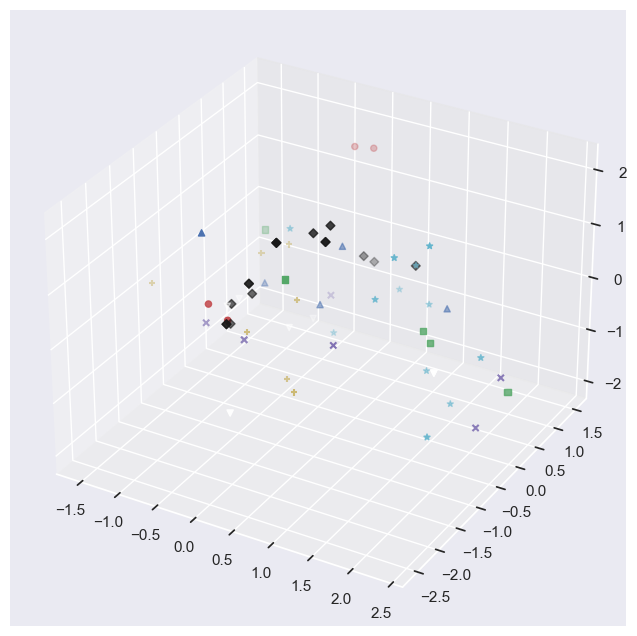

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('Dime_09_23.csv')
features = ['D1', 'D2', 'D3', 'D4', 'Fqgen', 'STAI_S_F', 'IRI_total_F', 'IRI_EC_F', 'SDO_F', 'RSE_F', 'Mach_F', 'Mach_Ctrl_F', 'Mach_S_F', 'SVO_other_F', 'SNS_d_F', 'RSE_r_F', 'desir_F', 'WTC_F']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

num_clusters = [3, 10, 30]

# Try different initial centroids for each k
results = []
for k in num_clusters:
    print('k =', k)
    models = []
    for i in range(10):
        model = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=300, random_state=i)
        model.fit(train_data[features])
        models.append(model)
    best_model = min(models, key=lambda x: x.inertia_)
    print('Inertia:', best_model.inertia_)
    results.append(best_model)

# silhouette and calinski scores
silhouette_scores = []
calinski_scores = []
for model in results:
    labels = model.predict(test_data[features])
    silhouette_scores.append(silhouette_score(test_data[features], labels))
    calinski_scores.append(calinski_harabasz_score(test_data[features], labels))

# best model based on the scores
best_model_index = np.argmax(silhouette_scores)
best_model = results[best_model_index]
print('Best model:', best_model)

# predictions on the test set
test_data['cluster'] = best_model.predict(test_data[features])

# Visualizing the clusters in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
markers = ['o', 's', '^', '*', 'x', '+', 'D', 'v', '<', '>']
for i in range(best_model.n_clusters):
    cluster_data = test_data[test_data['cluster'] == i]
    ax.scatter(cluster_data['D1'], cluster_data['D2'], cluster_data['D3'], c=colors[i], marker=markers[i], label='Cluster {}'.format(i))
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.legend()
plt.show()


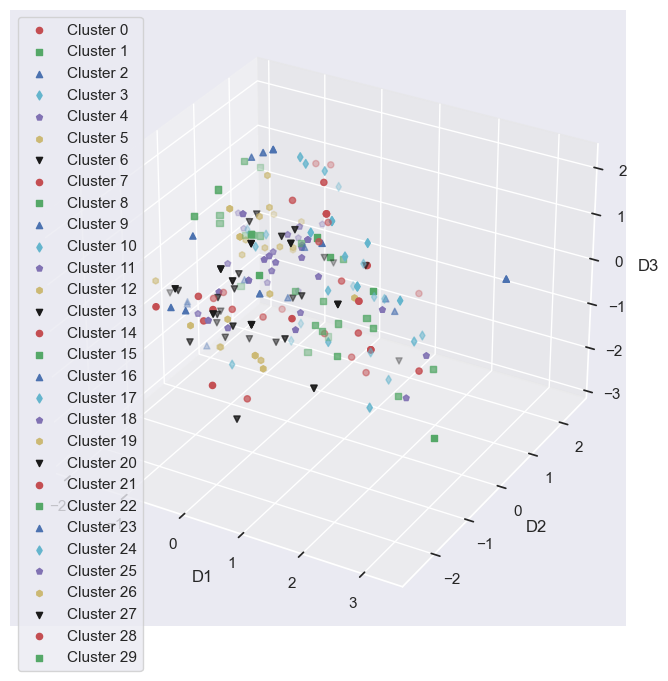

In [59]:
import itertools

# colors and markers
colors = itertools.cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
markers = itertools.cycle(['o', 's', '^', 'd', 'p', 'h', 'v'])

# plot clusters in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(best_model.n_clusters):
    cluster_data = test_data[test_data['cluster'] == i]
    c = next(colors)
    m = next(markers)
    ax.scatter(cluster_data['D1'], cluster_data['D2'], cluster_data['D3'], c=c, marker=m, label='Cluster {}'.format(i))
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
ax.legend()
plt.show()
